## Langkah 1 - Ilustrasi Data Non-Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.


Langkah 1a - Import Library


In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC


Langkah 1b - Buat Kembali Fungsi Plotting


In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)




Langkah 1c - Buat Data Dummy Non-Linier


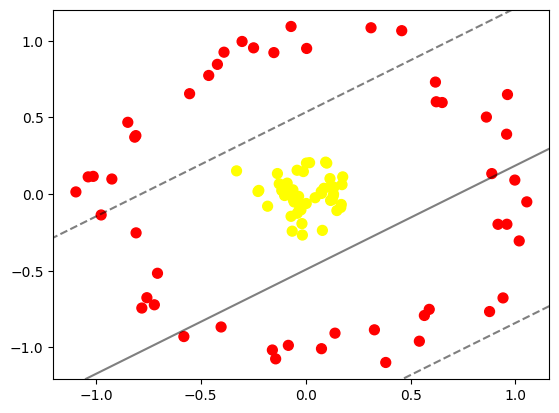

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);



In [4]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))



interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.81700771e-01, -1.09779072e+00],
       [-2.23323562e-01,  2.43837802e-02],
       [-2.48379824e-01,  9.54292367e-01],
       [ 2.61293043e-03, -6.08620050e-02],
       [ 1.32806404e-01, -2.00144044e-04],
       [ 4.64284128e-03,  9.50345928e-01],
       [-8.43765792e-02,  3.01386276e-02],
       [-9.98363698e-02,  4.00868685e-03],
       [-9.04623742e-02,  1.48121962e-03],
       [ 9.51712340e-02,  2.08914469e-01],
       [ 8.74019446e-02,  3.83469578e-02],
       [ 1.69612825e-01, -6.72177227e-02],
       [-9.07744971e-02,  1.72114379e-02],
       [ 9.57739361e-01,  3.91006402e-01],
       [-2.79638385e-02, -6.99787067e-02],
       [-1.09525226e+00,  1.46858575e-02],
       [-3.36930386e-02, -1.44069493e-02],
       [-7.21284663e-01, -7.21560114e-01],
       [ 4.51384907e-02, -2.32858308e-02],
       [ 5.41871978e-01, -9.59020774e-01],
       [-2.27243000e-01,  1.75675840e-02],
       [-5.76638163e-02, -1.93646058e-02],
       [-1.77551801e-02, -1.92055185e-01],
       [ 5.65752049e-01, -7.91206649e-01],
       [-9.74889844e-01, -1.35696746e-01],
       [-5.50416417e-02, -5.07628473e-02],
       [ 3.27621853e-01, -8.84765492e-01],
       [-5.80566163e-01, -9.28681545e-01],
       [ 8.87107544e-01,  1.34123023e-01],
       [ 8.76572831e-01, -7.65604771e-01],
       [-9.23845722e-01,  9.87823050e-02],
       [ 6.50564096e-01,  5.97649819e-01],
       [-3.03136269e-01,  9.95853433e-01],
       [-4.02566387e-02, -1.24558501e-01],
       [ 7.53371490e-02, -1.00786108e+00],
       [ 7.41527396e-02,  1.70721014e-02],
       [ 8.61377640e-01,  5.02772418e-01],
       [ 1.87072189e-02,  2.05405083e-01],
       [ 1.67190180e-01, -8.66450880e-02],
       [ 6.18563339e-01,  7.30959802e-01],
       [-1.03665507e+00,  1.12782690e-01],
       [-4.03086031e-01, -8.66274908e-01],
       [ 9.61882398e-01,  6.49752762e-01],
       [ 1.00520346e-01,  2.02444742e-01],
       [ 1.15824342e-01,  1.01597079e-01],
       [ 1.34749259e-01,  4.56366180e-02],
       [ 1.48750813e-01, -1.06820900e-01],
       [ 7.57934591e-02,  4.80066442e-03],
       [-7.56870345e-01, -6.75311975e-01],
       [-1.34634608e-01,  1.34413177e-01],
       [-3.04754628e-02, -1.01086910e-01],
       [-4.08459834e-02,  1.55942212e-01],
       [-6.96800816e-02, -1.44517195e-01],
       [-4.62103688e-01,  7.74236412e-01],
       [ 9.96918714e-01,  9.18357888e-02],
       [-7.06316947e-01, -5.15981882e-01],
       [-6.08750234e-02,  2.81327545e-02],
       [ 9.40658588e-01, -6.76735633e-01],
       [ 1.73142528e-01,  6.21413665e-02],
       [-6.42269139e-02, -2.41412927e-01],
       [ 7.96375935e-02, -2.36266482e-01],
       [ 3.11512638e-01,  1.08525797e+00],
       [-3.89252897e-01,  9.25907653e-01],
       [-1.58745151e-01, -1.01650267e+00],
       [ 9.16788631e-01, -1.96595844e-01],
       [ 1.26215276e-01, -3.58045539e-02],
       [-1.10740409e-02,  1.47458441e-01],
       [ 4.57857570e-01,  1.06624645e+00],
       [-1.81443363e-01, -7.86496943e-02],
       [ 6.22356736e-01,  6.02599653e-01],
       [ 1.76640221e-01,  1.12825023e-01],
       [ 9.59129025e-01, -1.96247361e-01],
       [-6.97342618e-02,  1.09365417e+00],
       [-1.25960064e-01,  6.72841725e-02],
       [-1.51528801e-01,  9.23309184e-01],
       [ 1.01783148e+00, -3.04904938e-01],
       [ 1.18392106e-01,  4.76967967e-02],
       [ 5.88973454e-01, -7.51400357e-01],
       [ 3.74334065e-03,  2.02788295e-01],
       [-8.08347776e-01, -2.52403026e-01],
       [-8.14840986e-01,  3.71719519e-01],
       [-8.25842628e-02, -9.86092407e-01],
       [ 1.18851129e-01, -4.06010042e-02],
       [-8.09416514e-01,  3.81828164e-01],
       [ 1.39776989e-01, -9.06614599e-01],
       [-8.81899246e-02,  7.19229674e-02],
       [ 1.05400983e+00, -5.02156965e-02],
       [-1.13923382e-01,  2.38539022e-02],
       [-1.01277040e+00,  1.16060559e-01],
       [-4.20761453e-01,  8.46601205e-01],
       [-1.00372334e-01, -8.82072829e-03],
       [-3.29461047e-01,  1.51979647e-01

## Langkah 2 - Fitting Model

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.


In [5]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)



Plot hasil decision boundaries dari kernel RBF


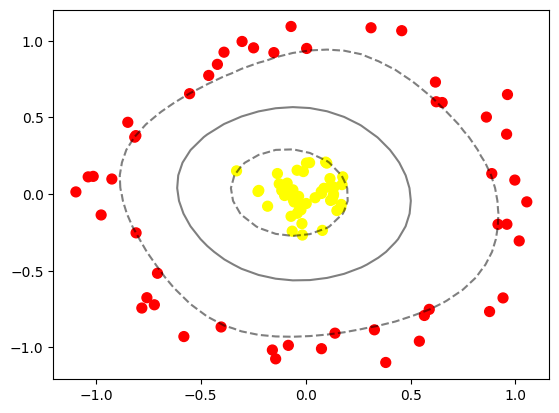

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')